In [9]:
! pip install numpy pandas matplotlib seaborn scikit-learn xgboost lightgbm catboost mlxtend statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 975.2 kB/s eta 0:00:11
   - -------------------------------------- 0.3/9.9 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.9 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/9.9 MB 5.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.9 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/9.9 MB 4.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.9 MB 5.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.9 MB 5.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.9 MB 5.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.7/9.9 MB 5.1 MB/s eta 0:00:02
   ----------- ---------------------------- 2.8/9.9 MB 5.1 MB/s eta 0:00:02
   ------------- -------

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import RidgeClassifier





# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

------
## Reading Data

In [13]:
Trained_Data = pd.read_csv("NSL-KDD/KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv("NSL-KDD/KDDTest+.txt" , sep = "," , encoding = 'utf-8')

---------
## Exploring Data

In [14]:
Trained_Data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [15]:
Tested_Data

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


---------
## Columns Modification

In [16]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [17]:
Trained_Data.columns = Columns
Tested_Data.columns  = Columns

In [18]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [19]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


## Feature selection for SDN context

In [22]:
columns = ['duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'attack']
Trained_Data = Trained_Data[columns]
Tested_Data = Tested_Data[columns]

In [21]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   duration       125972 non-null  int64 
 1   protocol_type  125972 non-null  object
 2   service        125972 non-null  object
 3   src_bytes      125972 non-null  int64 
 4   dst_bytes      125972 non-null  int64 
 5   count          125972 non-null  int64 
 6   srv_count      125972 non-null  int64 
 7   attack         125972 non-null  object
dtypes: int64(5), object(3)
memory usage: 7.7+ MB


In [23]:
Tested_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   duration       22543 non-null  int64 
 1   protocol_type  22543 non-null  object
 2   service        22543 non-null  object
 3   src_bytes      22543 non-null  int64 
 4   dst_bytes      22543 non-null  int64 
 5   count          22543 non-null  int64 
 6   srv_count      22543 non-null  int64 
 7   attack         22543 non-null  object
dtypes: int64(5), object(3)
memory usage: 1.4+ MB


In [24]:
Trained_Data.describe()

,duration,src_bytes,dst_bytes,count,srv_count
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,84.108207,27.738093
std,2604.525522,5.870354e+06,4.021285e+06,114.508828,72.636092
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,2.000000,2.000000
50%,0.000000,4.400000e+01,0.000000e+00,14.000000,8.000000
75%,0.000000,2.760000e+02,5.160000e+02,143.000000,18.000000
max,42908.000000,1.379964e+09,1.309937e+09,511.000000,511.000000


In [25]:
Tested_Data.describe()

,duration,src_bytes,dst_bytes,count,srv_count
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,79.021692,31.125316
std,1407.207069,4.727969e+05,2.121976e+04,128.538218,89.064396
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000
50%,0.000000,5.400000e+01,4.600000e+01,8.000000,6.000000
75%,0.000000,2.870000e+02,6.010000e+02,123.000000,16.000000
max,57715.000000,6.282565e+07,1.345927e+06,511.000000,511.000000


-----
## Exploring Responses

In [26]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'normal', 'phf', 'satan', 'warezmaster', 'ftp_write', 'teardrop', 'smurf', 'land', 'neptune', 'back', 'warezclient', 'ipsweep', 'perl', 'buffer_overflow', 'pod', 'imap', 'loadmodule', 'portsweep', 'spy', 'nmap', 'guess_passwd', 'rootkit', 'multihop'} 

## Classifying The Attack Results

In [27]:
# changing attack labels to their respective attack class
def change_label(df):
 df.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
 df.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
 df.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
 df.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)


In [28]:
change_label(Trained_Data)
change_label(Tested_Data)

In [29]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack_state'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack_state'] = attack_LE.fit_transform(Tested_Data["attack"])

In [30]:
Trained_Data.head(10)

,duration,protocol_type,service,src_bytes,dst_bytes,count,srv_count,attack,attack_state
0,0,udp,other,146,0,13,1,normal,4
1,0,tcp,private,0,0,123,6,Dos,0
2,0,tcp,http,232,8153,5,5,normal,4
3,0,tcp,http,199,420,30,32,normal,4
4,0,tcp,private,0,0,121,19,Dos,0
5,0,tcp,private,0,0,166,9,Dos,0
6,0,tcp,private,0,0,117,16,Dos,0
7,0,tcp,remote_job,0,0,270,23,Dos,0
8,0,tcp,private,0,0,133,8,Dos,0
9,0,tcp,private,0,0,205,12,Dos,0


In [31]:
Trained_Data.attack.value_counts()

attack
normal    67342
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

In [32]:
Tested_Data.attack.value_counts()

attack
normal    9711
Dos       7459
R2L       2885
Probe     2421
U2R         67
Name: count, dtype: int64

In [33]:
Trained_Data.head(10)

,duration,protocol_type,service,src_bytes,dst_bytes,count,srv_count,attack,attack_state
0,0,udp,other,146,0,13,1,normal,4
1,0,tcp,private,0,0,123,6,Dos,0
2,0,tcp,http,232,8153,5,5,normal,4
3,0,tcp,http,199,420,30,32,normal,4
4,0,tcp,private,0,0,121,19,Dos,0
5,0,tcp,private,0,0,166,9,Dos,0
6,0,tcp,private,0,0,117,16,Dos,0
7,0,tcp,remote_job,0,0,270,23,Dos,0
8,0,tcp,private,0,0,133,8,Dos,0
9,0,tcp,private,0,0,205,12,Dos,0


In [34]:
Tested_Data.head(10)

,duration,protocol_type,service,src_bytes,dst_bytes,count,srv_count,attack,attack_state
0,0,tcp,private,0,0,136,1,Dos,0
1,2,tcp,ftp_data,12983,0,1,1,normal,4
2,0,icmp,eco_i,20,0,1,65,Probe,1
3,1,tcp,telnet,0,15,1,8,Probe,1
4,0,tcp,http,267,14515,4,4,normal,4
5,0,tcp,smtp,1022,387,1,3,normal,4
6,0,tcp,telnet,129,174,1,1,R2L,2
7,0,tcp,http,327,467,33,47,normal,4
8,0,tcp,ftp,26,157,1,1,R2L,2
9,0,tcp,telnet,0,0,1,1,Probe,1


--------
## Data preprocessing
### Chechking for Missing Data

In [35]:
Trained_Data.isnull().sum()

duration         0
protocol_type    0
service          0
src_bytes        0
dst_bytes        0
count            0
srv_count        0
attack           0
attack_state     0
dtype: int64

In [36]:
Tested_Data.isnull().sum()

duration         0
protocol_type    0
service          0
src_bytes        0
dst_bytes        0
count            0
srv_count        0
attack           0
attack_state     0
dtype: int64

-----
- **There is no missing data**

--------
### Checking for Duplicates

In [37]:
Trained_Data.duplicated().sum()

38053

In [38]:
Trained_Data.drop_duplicates(subset=None, keep="first", inplace=True)
Trained_Data.duplicated().sum()

0

In [39]:
Tested_Data.duplicated().sum()

6700

In [40]:
Tested_Data.drop_duplicates(subset=None, keep="first", inplace=True)
Tested_Data.duplicated().sum()

0

---------
- **There is no duplicated data**

-------------
## Data Encoding

In [42]:
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service'],prefix="",prefix_sep="")

In [43]:
Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service'],prefix="",prefix_sep="")

In [44]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])

In [45]:
Trained_Data['attack']

0         4
1         0
2         4
3         4
4         0
         ..
125962    4
125964    4
125966    4
125968    4
125969    4
Name: attack, Length: 87919, dtype: int32

----
## Data Splitting 

In [47]:
X_train = Trained_Data.drop('attack', axis = 1)
X_train = Trained_Data.drop('attack_state', axis = 1)

X_test = Tested_Data.drop('attack', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)


Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']

In [48]:
X_train_train,X_test_train ,Y_train_train,Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test,X_test_test,Y_train_test,Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

---------
## Data Scaling

In [49]:
Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train) 
X_test_train= Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test) 
X_test_test= Ro_scaler.transform(X_test_test)

In [50]:
X_train_train.shape, Y_train_train.shape

((65939, 79), (65939,))

In [51]:
X_test_train.shape, Y_test_train.shape

((21980, 79), (21980,))

In [52]:
X_train_test.shape, Y_train_test.shape

((11882, 73), (11882,))

In [53]:
X_test_test.shape, Y_test_test.shape

((3961, 73), (3961,))

------
## Working on Trained Data
### VIF 

In [54]:
A = sm.add_constant(X_train.astype(float))
Est1 = sm.GLM(Y_train.astype(float), A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:                87919
Model:                            GLM   Df Residuals:                    87842
Model Family:                Gaussian   Df Model:                           76
Link Function:               Identity   Scale:                      2.3007e-21
Method:                          IRLS   Log-Likelihood:             1.9906e+06
Date:                Sat, 11 May 2024   Deviance:                   1.1105e-16
Time:                        21:16:14   Pearson chi2:                 1.11e-16
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.667e-11   1.68e-12     39.786      0.000    6.34e-11       7e-11
duration      1.72e-16    5.7e-17      3.016      0.003    6.02e-17    2.84e-16
src_bytes    6.957e-19   2.31e-20     30.119      0.000     6.5e-19    7.41e-19
dst_bytes   -3.747e-18   3.36e-20   -111.413      0.000   -3.81e-18   -3.68e-18
count       -5.009e-14   3.16e-15    -15.836      0.000   -5.63e-14   -4.39e-14
srv_count    5.567e-14   5.29e-15     10.515      0.000    4.53e-14     6.6e-14
attack          1.0000   2.31e-13   4.33e+12      0.000       1.000       1.000
icmp         2.381e-10   4.15e-12     57.415      0.000     2.3e-10    2.46e-10
tcp         -6.733e-11   1.61e-12    -41.897      0.000   -7.05e-11   -6.42e-11
udp         -1.041e-10   1.76e-12    -59.066      0.000   -1.08e-10   -1.01e-10
IRC         -1.274e-10   3.93e-12    -32.428      0.000   -1.35e-10    -1.2e-10
X11         -7.148e-11   6.18e-12    -11.568      0.000   -8.36e-11   -5.94e-11
Z39_50       2.512e-12   2.32e-12      1.082      0.279   -2.04e-12    7.06e-12
aol         -3.051e-10   4.73e-11     -6.457      0.000   -3.98e-10   -2.13e-10
auth        -2.321e-11   2.37e-12     -9.811      0.000   -2.79e-11   -1.86e-11
bgp          9.016e-12   2.43e-12      3.709      0.000    4.25e-12    1.38e-11
courier     -4.405e-11    2.6e-12    -16.973      0.000   -4.91e-11    -3.9e-11
csnet_ns      1.17e-11    2.6e-12      4.499      0.000     6.6e-12    1.68e-11
ctf          1.678e-11   2.62e-12      6.408      0.000    1.16e-11    2.19e-11
daytime       9.38e-13   2.67e-12      0.351      0.726    -4.3e-12    6.18e-12
discard       1.08e-11   2.64e-12      4.093      0.000    5.63e-12     1.6e-11
domain       2.518e-12    2.6e-12      0.967      0.334   -2.59e-12    7.62e-12
domain_u     7.393e-11   2.06e-12     35.834      0.000    6.99e-11     7.8e-11
echo         3.129e-11   2.82e-12     11.102      0.000    2.58e-11    3.68e-11
eco_i       -5.956e-10   6.88e-12    -86.605      0.000   -6.09e-10   -5.82e-10
ecr_i        -3.22e-10    5.7e-12    -56.461      0.000   -3.33e-10   -3.11e-10
efs         -3.788e-12   2.88e-12     -1.316      0.188   -9.43e-12    1.85e-12
exec        -2.078e-11   2.93e-12     -7.080      0.000   -2.65e-11    -1.5e-11
finger       2.292e-11   2.12e-12     10.830      0.000    1.88e-11    2.71e-11
ftp          1.446e-10   1.99e-12     72.751      0.000    1.41e-10    1.49e-10
ftp_data     2.918e-11   1.85e-12     15.770      0.000    2.56e-11    3.28e-11
gopher           1e-12   2.67e-12      0.375      0.708   -4.23e-12    6.23e-12
harvest     -7.779e-11   3.34e-11     -2.326      0.020   -1.43e-10   -1.22e-11
hostnames    4.373e-11   2.76e-12     15.817      0.000    3.83e-11    4.92e-11
http         3.426e-11    1.7e-12     20.098      0.000    3.09e-11    3.76e-11
http_2784   -3.051e-10   4.73e-11     -6.45

--------
### Data Modeling

#### Evaluating Function

In [55]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value = Model_Abb.predict(X_test)
    
    Accuracy = metrics.accuracy_score(Y_test, Pred_Value)
    Precision = metrics.precision_score(Y_test, Pred_Value, average='weighted')
    Recall = metrics.recall_score(Y_test, Pred_Value, average='weighted')
    F1_score = metrics.f1_score(Y_test, Pred_Value, average='weighted')
    
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,2)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,2)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,2)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,2)))
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix, class_names=['normal','Dos','R2L','Probe','U2R'], figsize=(5.55,5), colorbar= "blue")
    
    # Compute ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(np.unique(Y_test))
    y_score = Model_Abb.predict_proba(X_test)
    y_onehot_test = pd.get_dummies(Y_test)
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_onehot_test.iloc[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC AUC
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_onehot_test.values.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

    # Plot ROC curve
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(fpr["micro"], tpr["micro"], label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})", color="deeppink", linestyle=":", linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"], label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})", color="navy", linestyle=":", linewidth=4)
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        plt.plot(fpr[class_id], tpr[class_id], color=color, lw=2, label=f"ROC curve for class {class_id} (AUC = {roc_auc[class_id]:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(Model_Name)
    plt.legend(loc="lower right")
    plt.show()



#### Grid Search Function

In [56]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

## 1. Logistic Regression

In [57]:
LR= LogisticRegression()
LR.fit(X_train_train , Y_train_train)

LogisticRegression()

In [58]:
LR.score(X_train_train, Y_train_train), LR.score(X_test_train, Y_test_train)

(0.9185004322176558, 0.9207461328480436)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.92

The Logistic Regression Model Precision  = 0.91

The Logistic Regression Model Recall     = 0.92

The Logistic Regression Model F1 Score   = 0.92

--------------------------------------------------



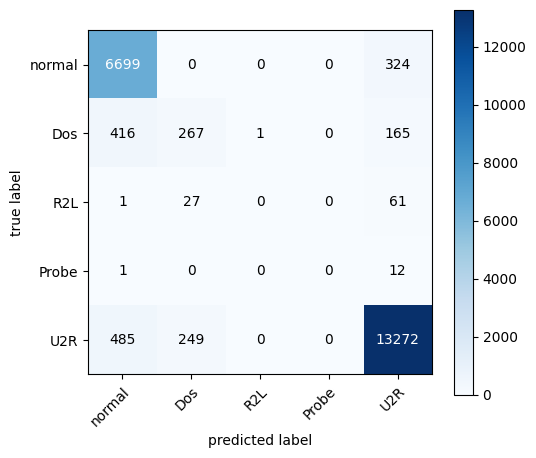

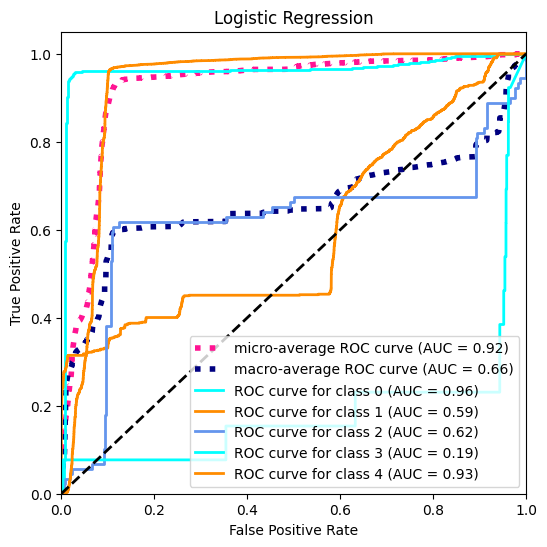

In [59]:
Evaluate('Logistic Regression', LR, X_test_train, Y_test_train)

----------------

## 2. Decision Tree Classifier

In [60]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [61]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.9878372435129438, 0.9878980891719745)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.99

The Decision Tree Classifier Model Precision  = 0.98

The Decision Tree Classifier Model Recall     = 0.99

The Decision Tree Classifier Model F1 Score   = 0.99

--------------------------------------------------



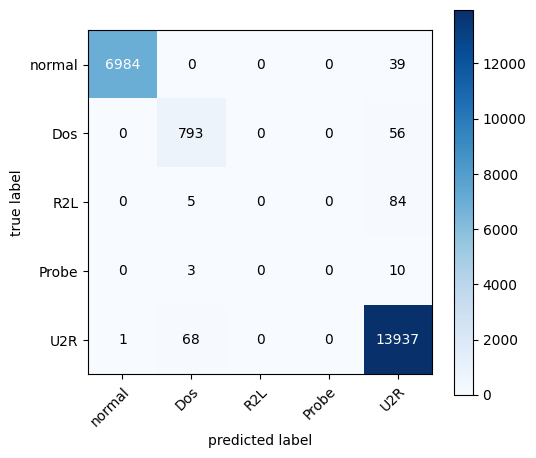

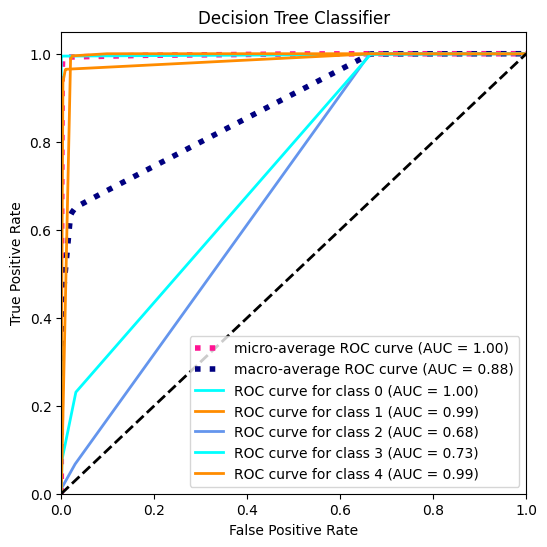

In [62]:
Evaluate('Decision Tree Classifier', DT, X_test_train, Y_test_train)

[Text(0.4423076923076923, 0.9, 'x[1] <= -0.617\ngini = 0.495\nsamples = 65939\nvalue = [21362, 2630, 287, 37, 41623]'),
 Text(0.19230769230769232, 0.7, 'x[7] <= -0.5\ngini = 0.211\nsamples = 23035\nvalue = [20313, 2470, 24, 9, 219]'),
 Text(0.11538461538461539, 0.5, 'x[21] <= 0.5\ngini = 0.012\nsamples = 645\nvalue = [0, 641, 0, 1, 3]'),
 Text(0.07692307692307693, 0.3, 'x[53] <= 0.5\ngini = 0.013\nsamples = 636\nvalue = [0, 632, 0, 1, 3]'),
 Text(0.038461538461538464, 0.1, 'gini = 0.011\nsamples = 551\nvalue = [0, 548, 0, 0, 3]'),
 Text(0.11538461538461539, 0.1, 'gini = 0.023\nsamples = 85\nvalue = [0, 84, 0, 1, 0]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0, 0]'),
 Text(0.2692307692307692, 0.5, 'x[5] <= -0.875\ngini = 0.17\nsamples = 22390\nvalue = [20313.0, 1829.0, 24.0, 8.0, 216.0]'),
 Text(0.23076923076923078, 0.3, 'gini = 0.0\nsamples = 20313\nvalue = [20313, 0, 0, 0, 0]'),
 Text(0.3076923076923077, 0.3, 'x[10] <= 0.5\ngini = 0.214\nsamples = 2

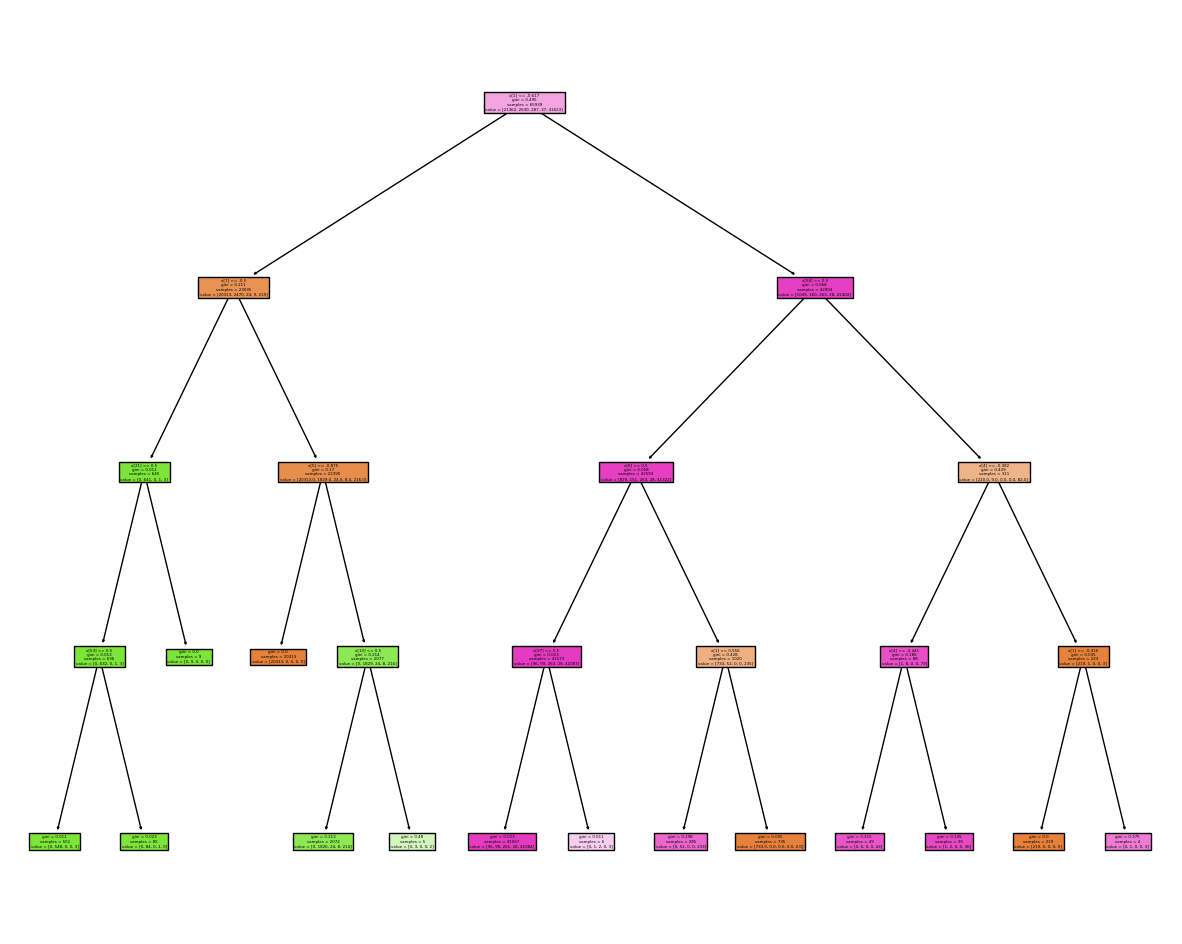

In [63]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

----------------

## 3. Random Forest Classifier

In [64]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters={ 'max_depth': max_depth}

In [65]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train_train, Y_train_train)

RandomForestClassifier(max_depth=11)

In [66]:
RF.fit(X_train_train, Y_train_train)

RandomForestClassifier()

In [67]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

(1.0, 0.999818016378526)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model Recall     = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

--------------------------------------------------



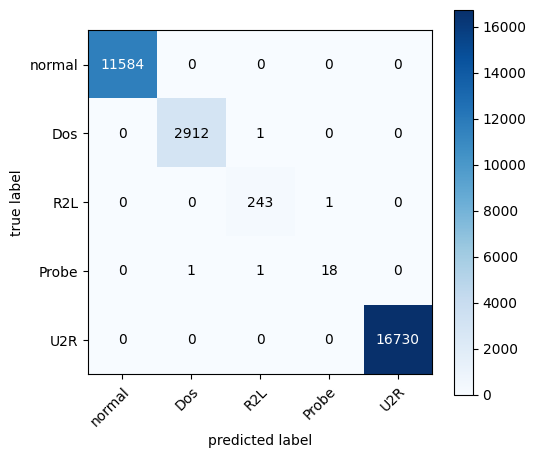

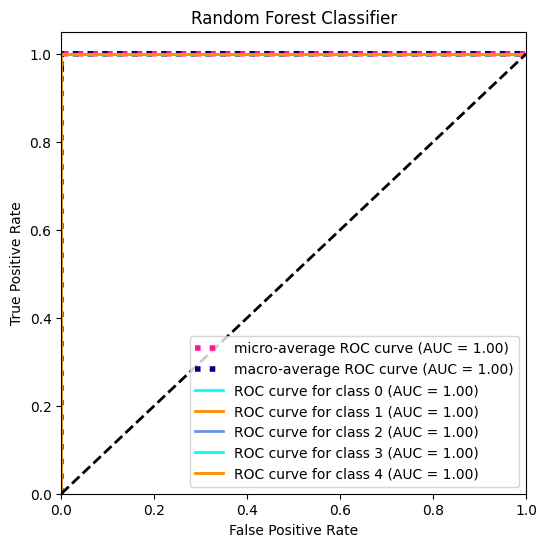

In [53]:
Evaluate('Random Forest Classifier', RF, X_test_train, Y_test_train)

----------------

## 4. KNN-Model

In [68]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train_train, Y_train_train)

KNeighborsClassifier(n_neighbors=6)

In [69]:
KNN.score(X_train_train, Y_train_train), KNN.score(X_test_train, Y_test_train)

(0.9916741230531249, 0.9885805277525023)

--------------------------------------------------

The KNN Model Accuracy   = 0.99

The KNN Model Precision  = 0.99

The KNN Model Recall     = 0.99

The KNN Model F1 Score   = 0.99

--------------------------------------------------



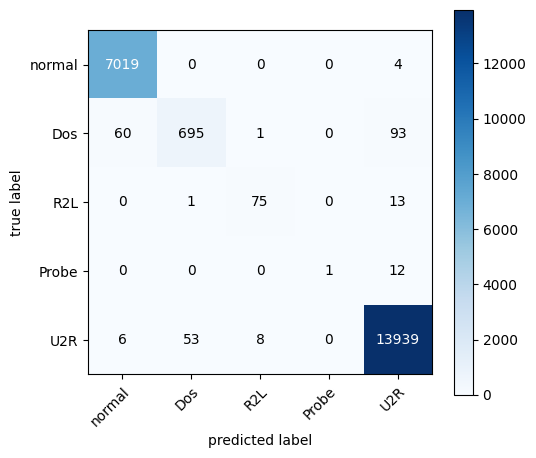

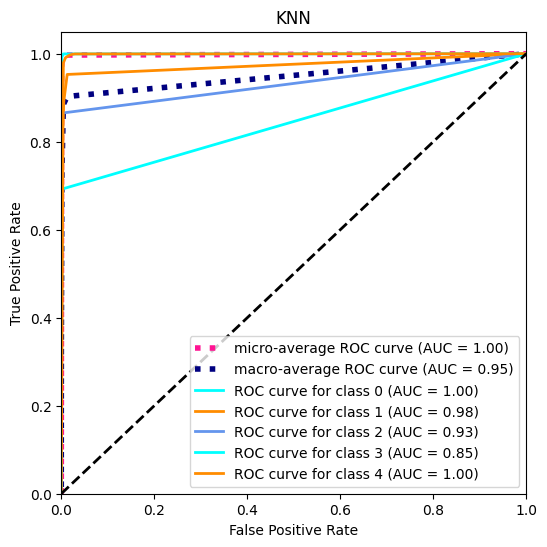

In [70]:
Evaluate('KNN', KNN, X_test_train, Y_test_train)

----------------
## 5. SVM Classifier

### 1st Kernel

In [71]:
# Create LinearSVC classifier without probability estimation
LinearSVC_classifier = LinearSVC()

# Wrap LinearSVC inside CalibratedClassifierCV with method='sigmoid' for Platt scaling
Platt_SVC = CalibratedClassifierCV(LinearSVC_classifier, method='sigmoid')

# Fit the classifier
Platt_SVC.fit(X_train_train, Y_train_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [72]:
Platt_SVC.score(X_train_train, Y_train_train), Platt_SVC.score(X_test_train, Y_test_train)

(0.9665448368947057, 0.9693357597816197)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.97

The SVM Linear SVC Kernel Model Precision  = 0.97

The SVM Linear SVC Kernel Model Recall     = 0.97

The SVM Linear SVC Kernel Model F1 Score   = 0.96

--------------------------------------------------



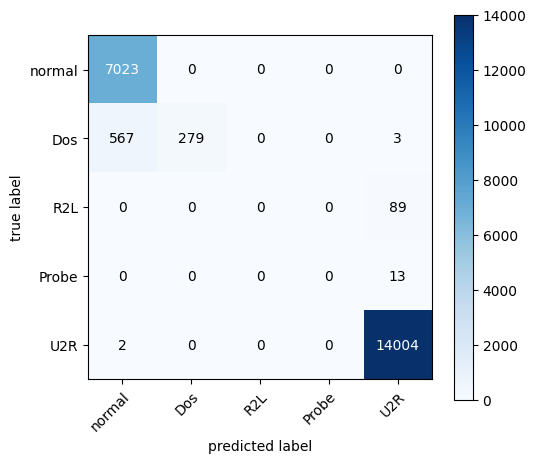

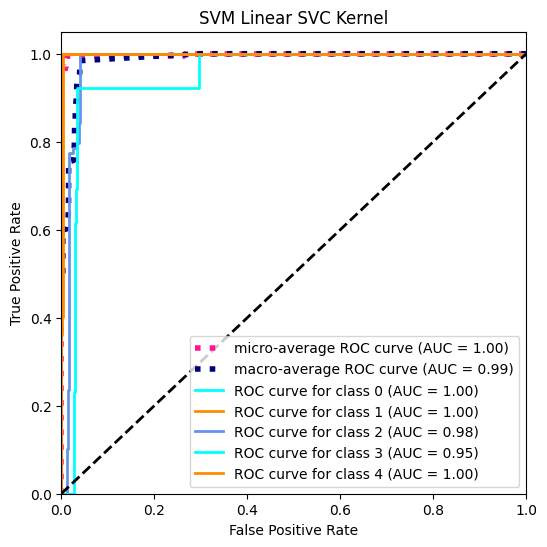

In [73]:
Evaluate('SVM Linear SVC Kernel', Platt_SVC,X_test_train, Y_test_train)

----------------
## 6. Gradient Boosting Classifier

In [74]:
# Instantiate and fit the Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(X_train_train, Y_train_train)


GradientBoostingClassifier()

In [75]:
# Print the training and testing scores
print("Gradient Boosting Classifier Training Score:", GB.score(X_train_train, Y_train_train))
print("Gradient Boosting Classifier Testing Score:", GB.score(X_test_train, Y_test_train))

Gradient Boosting Classifier Training Score: 0.9997725170233094
Gradient Boosting Classifier Testing Score: 0.9997725204731575


--------------------------------------------------

The Gradient Boosting Classifier Model Accuracy   = 1.0

The Gradient Boosting Classifier Model Precision  = 1.0

The Gradient Boosting Classifier Model Recall     = 1.0

The Gradient Boosting Classifier Model F1 Score   = 1.0

--------------------------------------------------



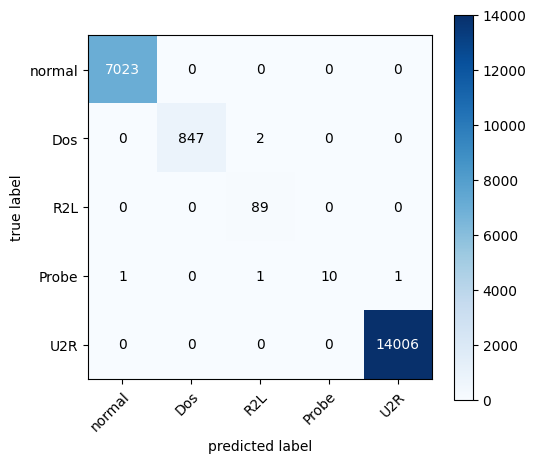

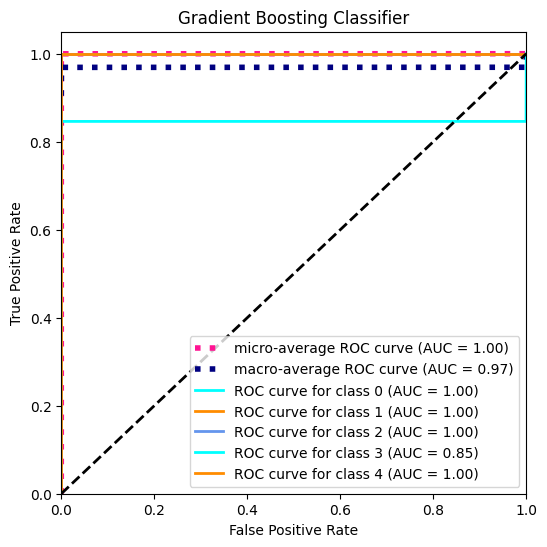

In [76]:
# Evaluate the Gradient Boosting Classifier
Evaluate('Gradient Boosting Classifier', GB, X_test_train, Y_test_train)

----------------

## 7. Extreme Gradient Boosting (XGBoost) Classifier

In [77]:
# Instantiate and fit the XGBoost Classifier
XGB = xgb.XGBClassifier(n_estimators=100, random_state=42)
XGB.fit(X_train_train, Y_train_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [78]:
# Print the training and testing scores
print("XGBoost Classifier Training Score:", XGB.score(X_train_train, Y_train_train))
print("XGBoost Classifier Testing Score:", XGB.score(X_test_train, Y_test_train))

XGBoost Classifier Training Score: 1.0
XGBoost Classifier Testing Score: 1.0


--------------------------------------------------

The XGBoost Classifier Model Accuracy   = 1.0

The XGBoost Classifier Model Precision  = 1.0

The XGBoost Classifier Model Recall     = 1.0

The XGBoost Classifier Model F1 Score   = 1.0

--------------------------------------------------



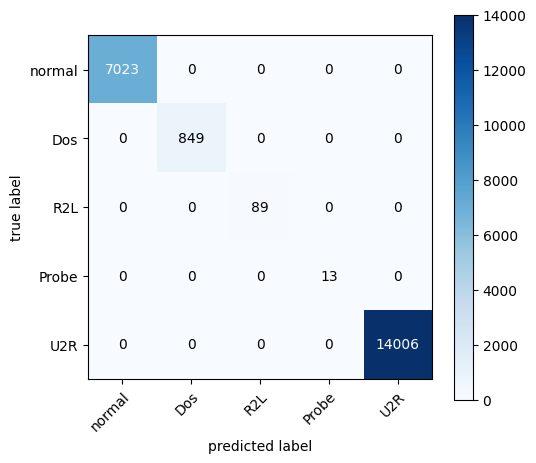

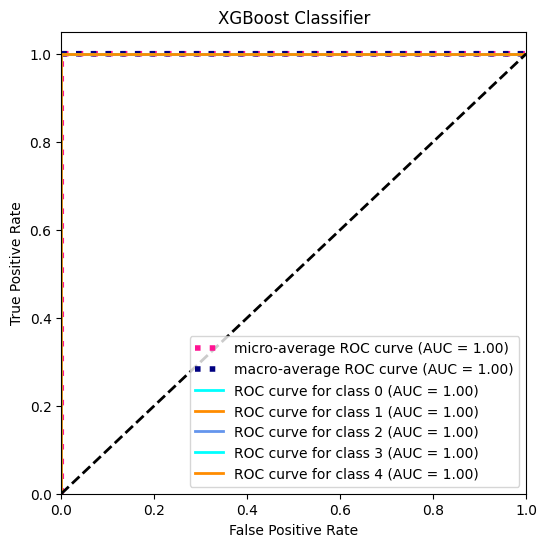

In [79]:
# Evaluate the XGBoost Classifier
Evaluate('XGBoost Classifier', XGB, X_test_train, Y_test_train)

----------------

## 8. Light Gradient Boosting Machine (LGBM) Classifier

In [80]:
# Instantiate and fit the LGBM Classifier
LGBM = lgb.LGBMClassifier()
LGBM.fit(X_train_train, Y_train_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1405
[LightGBM] [Info] Number of data points in the train set: 65939, number of used features: 69
[LightGBM] [Info] Start training from score -1.127116
[LightGBM] [Info] Start training from score -3.221746
[LightGBM] [Info] Start training from score -5.437003
[LightGBM] [Info] Start training from score -7.485567
[LightGBM] [Info] Start training from score -0.460077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier()

In [81]:
# Print the training and testing scores
print("LGBM Classifier Training Score:", LGBM.score(X_train_train, Y_train_train))
print("LGBM Classifier Testing Score:", LGBM.score(X_test_train, Y_test_train))

LGBM Classifier Training Score: 0.9777218338161028
LGBM Classifier Testing Score: 0.9794358507734304


--------------------------------------------------

The LGBM Classifier Model Accuracy   = 0.98

The LGBM Classifier Model Precision  = 0.97

The LGBM Classifier Model Recall     = 0.98

The LGBM Classifier Model F1 Score   = 0.98

--------------------------------------------------



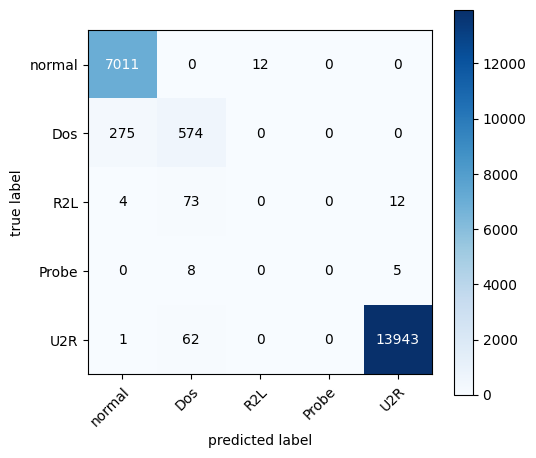

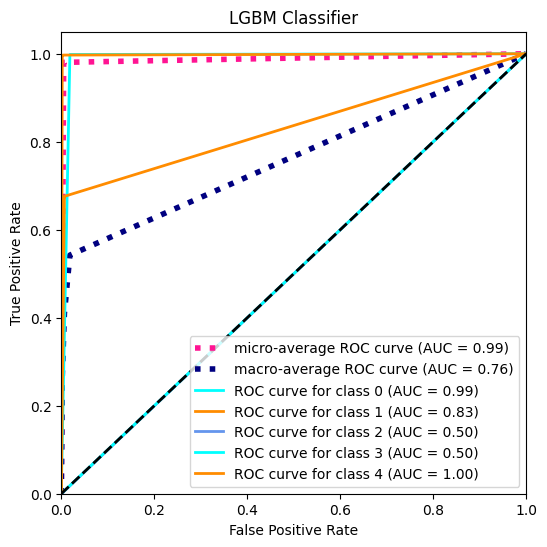

In [82]:
# Evaluate the LGBM Classifier
Evaluate('LGBM Classifier', LGBM, X_test_train, Y_test_train)

----------------

## 9. CatBoost Classifier

In [83]:
# Instantiate and fit the CatBoost Classifier
CatBoost = CatBoostClassifier(learning_rate=0.1,depth=6,n_estimators=100,l2_leaf_reg=3,random_state=42)
CatBoost.fit(X_train_train, Y_train_train)

0:	learn: 1.2330035	total: 152ms	remaining: 15.1s
1:	learn: 1.0036343	total: 166ms	remaining: 8.15s
2:	learn: 0.8403398	total: 180ms	remaining: 5.81s
3:	learn: 0.7158628	total: 194ms	remaining: 4.66s
4:	learn: 0.6168994	total: 207ms	remaining: 3.94s
5:	learn: 0.5361164	total: 220ms	remaining: 3.45s
6:	learn: 0.4687972	total: 234ms	remaining: 3.11s
7:	learn: 0.4119437	total: 246ms	remaining: 2.83s
8:	learn: 0.3636857	total: 260ms	remaining: 2.63s
9:	learn: 0.3221503	total: 273ms	remaining: 2.46s
10:	learn: 0.2862605	total: 287ms	remaining: 2.32s
11:	learn: 0.2548669	total: 301ms	remaining: 2.21s
12:	learn: 0.2273785	total: 314ms	remaining: 2.1s
13:	learn: 0.2032309	total: 327ms	remaining: 2.01s
14:	learn: 0.1818417	total: 341ms	remaining: 1.93s
15:	learn: 0.1629907	total: 355ms	remaining: 1.86s
16:	learn: 0.1463599	total: 368ms	remaining: 1.8s
17:	learn: 0.1314148	total: 382ms	remaining: 1.74s
18:	learn: 0.1181874	total: 395ms	remaining: 1.68s
19:	learn: 0.1062837	total: 409ms	remaining

In [84]:
# Print the training and testing scores
print("CatBoost Classifier Training Score:", CatBoost.score(X_train_train, Y_train_train))
print("CatBoost Classifier Testing Score:", CatBoost.score(X_test_train, Y_test_train))


CatBoost Classifier Training Score: 1.0
CatBoost Classifier Testing Score: 1.0


--------------------------------------------------

The CatBoost Classifier Model Accuracy   = 1.0

The CatBoost Classifier Model Precision  = 1.0

The CatBoost Classifier Model Recall     = 1.0

The CatBoost Classifier Model F1 Score   = 1.0

--------------------------------------------------



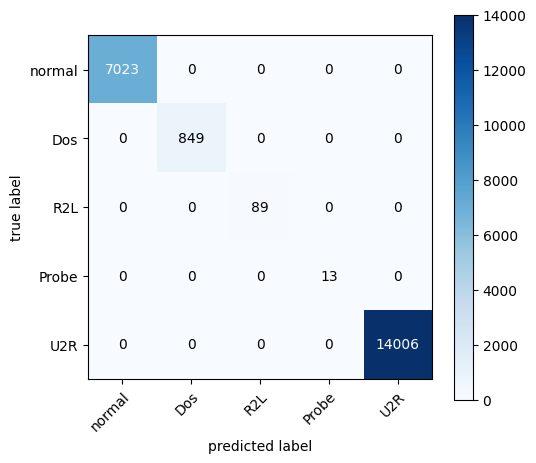

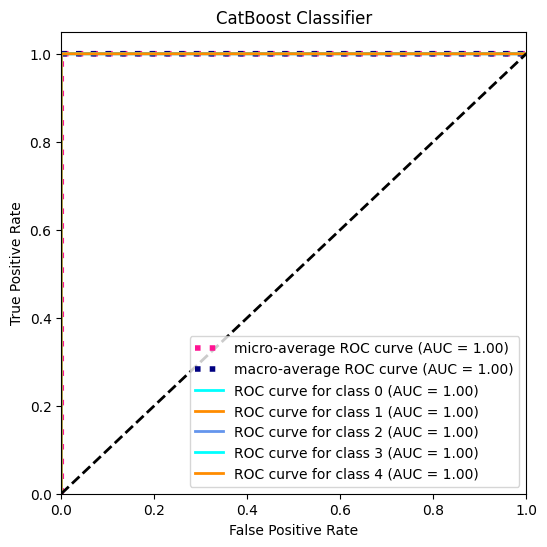

In [85]:
# Evaluate the CatBoost Classifier
Evaluate('CatBoost Classifier', CatBoost, X_test_train, Y_test_train)

----------------

## 10. Naive Bayes Classifier

In [86]:
# Instantiate and fit the Naive Bayes Classifier
NB = GaussianNB(var_smoothing=1e-9)
NB.fit(X_train_train, Y_train_train)

GaussianNB()

In [87]:
# Print the training and testing scores
print("Naive Bayes Classifier Training Score:", NB.score(X_train_train, Y_train_train))
print("Naive Bayes Classifier Testing Score:", NB.score(X_test_train, Y_test_train))


Naive Bayes Classifier Training Score: 0.36802195969001655
Naive Bayes Classifier Testing Score: 0.3633757961783439


--------------------------------------------------

The Naive Bayes Classifier Model Accuracy   = 0.36

The Naive Bayes Classifier Model Precision  = 0.73

The Naive Bayes Classifier Model Recall     = 0.36

The Naive Bayes Classifier Model F1 Score   = 0.26

--------------------------------------------------



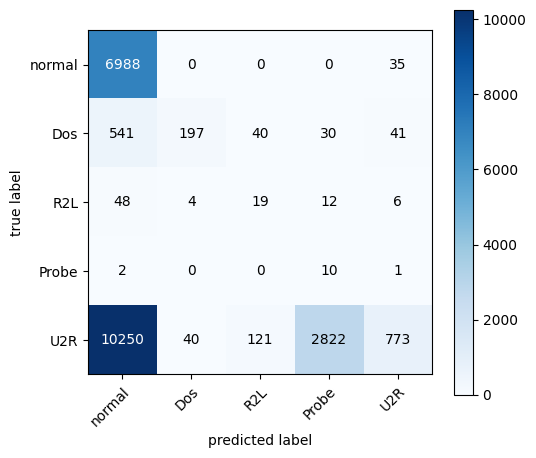

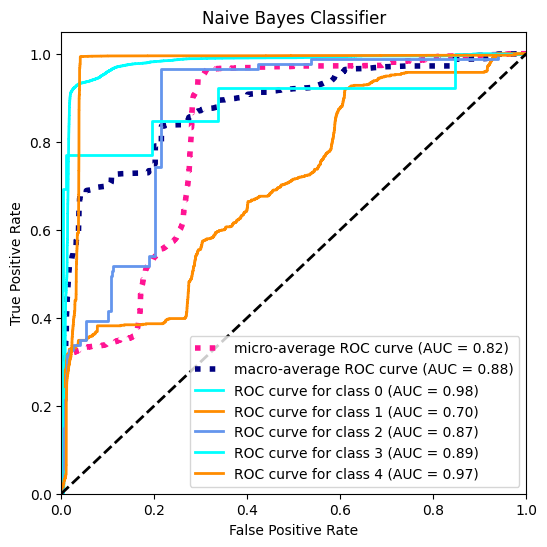

In [88]:
# Evaluate the Naive Bayes Classifier
Evaluate('Naive Bayes Classifier', NB, X_test_train, Y_test_train)

----------------

## 11. Linear Discriminant Analysis (LDA)

In [89]:
# Instantiate the LDA model 
LDA = LinearDiscriminantAnalysis(solver='lsqr')  
LDA.fit(X_train_train, Y_train_train)

LinearDiscriminantAnalysis(solver='lsqr')

In [90]:
# Print the training and testing scores
print("Linear Discriminant Analysis Training Score:", LDA.score(X_train_train, Y_train_train))
print("Linear Discriminant Analysis Testing Score:", LDA.score(X_test_train, Y_test_train))

Linear Discriminant Analysis Training Score: 0.9106295212241617
Linear Discriminant Analysis Testing Score: 0.9140582347588717


--------------------------------------------------

The Linear Discriminant Analysis Model Accuracy   = 0.91

The Linear Discriminant Analysis Model Precision  = 0.94

The Linear Discriminant Analysis Model Recall     = 0.91

The Linear Discriminant Analysis Model F1 Score   = 0.92

--------------------------------------------------



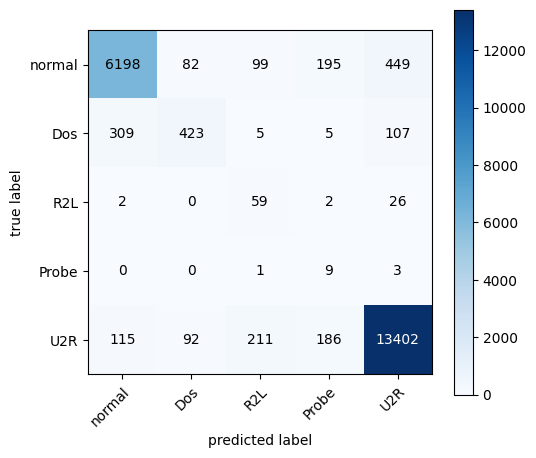

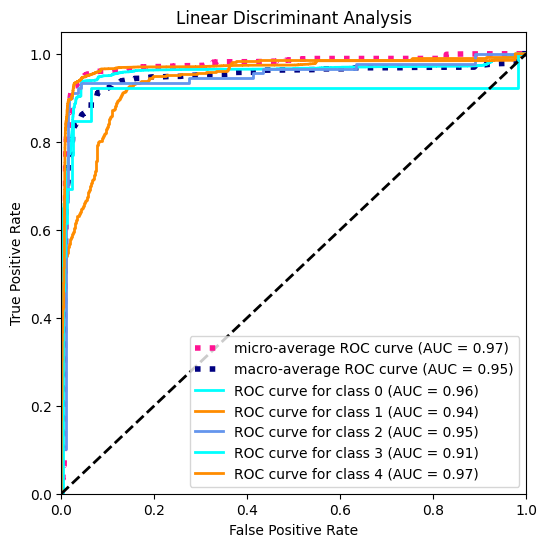

In [91]:
# Evaluate the LDA model
Evaluate('Linear Discriminant Analysis', LDA, X_test_train, Y_test_train)


----------------

## 12. Quadratic Discriminant Analysis (QDA)

In [92]:
# Instantiate the QDA model 
QDA = QuadraticDiscriminantAnalysis(reg_param=0.1) 
QDA.fit(X_train_train, Y_train_train)

QuadraticDiscriminantAnalysis(reg_param=0.1)

In [93]:
# Print the training and testing scores
print("Quadratic Discriminant Analysis Training Score:", QDA.score(X_train_train, Y_train_train))
print("Quadratic Discriminant Analysis Testing Score:", QDA.score(X_test_train, Y_test_train))


Quadratic Discriminant Analysis Training Score: 0.7027252460607532
Quadratic Discriminant Analysis Testing Score: 0.7048225659690628


--------------------------------------------------

The Quadratic Discriminant Analysis Model Accuracy   = 0.7

The Quadratic Discriminant Analysis Model Precision  = 0.83

The Quadratic Discriminant Analysis Model Recall     = 0.7

The Quadratic Discriminant Analysis Model F1 Score   = 0.71

--------------------------------------------------



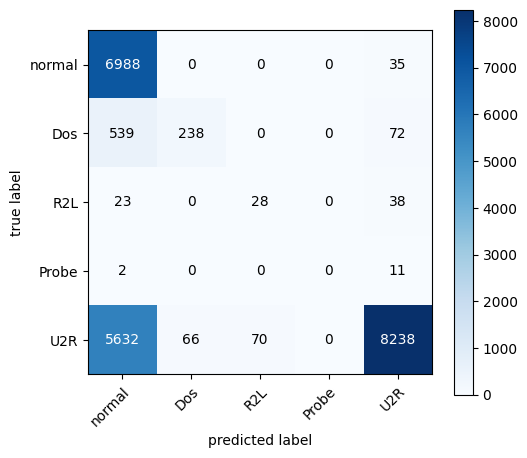

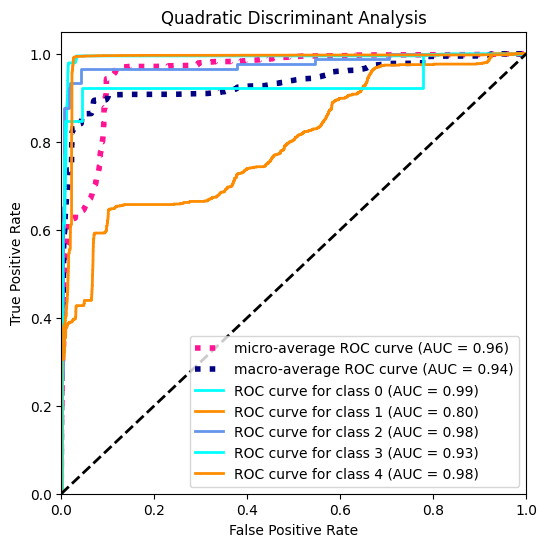

In [94]:
# Evaluate the QDA model 
Evaluate('Quadratic Discriminant Analysis', QDA, X_test_train, Y_test_train)

----------------

## 13. Passive Aggressive Classifier

In [95]:
# Create PassiveAggressiveClassifier
PAC_classifier = PassiveAggressiveClassifier(C=0.1, max_iter=1000)

# Wrap PassiveAggressiveClassifier inside CalibratedClassifierCV with method='sigmoid' for Platt scaling
Platt_PAC = CalibratedClassifierCV(PAC_classifier, method='sigmoid')

# Fit the classifier
Platt_PAC.fit(X_train_train, Y_train_train)

CalibratedClassifierCV(estimator=PassiveAggressiveClassifier(C=0.1))

In [96]:
# Print the training and testing scores
print("Passive Aggressive Classifier Training Score:", Platt_PAC.score(X_train_train, Y_train_train))
print("Passive Aggressive Classifier Testing Score:", Platt_PAC.score(X_test_train, Y_test_train))


Passive Aggressive Classifier Training Score: 0.9669543062527488
Passive Aggressive Classifier Testing Score: 0.9700181983621474


--------------------------------------------------

The Passive Aggressive Classifier Model Accuracy   = 0.97

The Passive Aggressive Classifier Model Precision  = 0.97

The Passive Aggressive Classifier Model Recall     = 0.97

The Passive Aggressive Classifier Model F1 Score   = 0.96

--------------------------------------------------



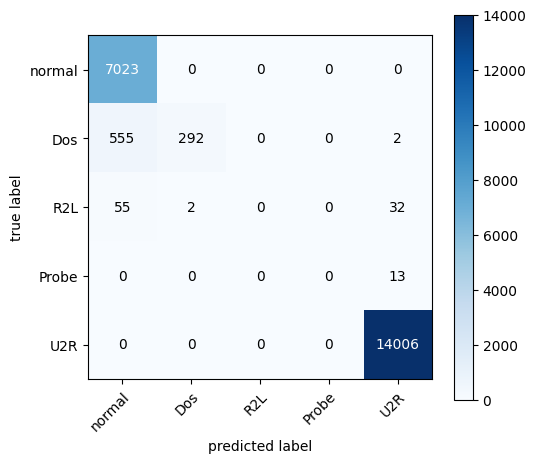

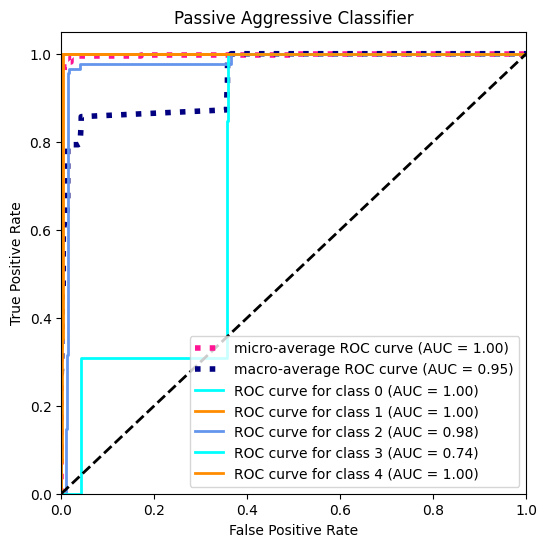

In [97]:
# Evaluate the Passive Aggressive Classifier
Evaluate('Passive Aggressive Classifier', Platt_PAC, X_test_train, Y_test_train)

----------------

## 14. AdaBoost Classifier

In [98]:
# Instantiate the base estimator (DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_features=6, max_depth=4)  

# Instantiate the AdaBoost Classifier with adjusted parameters
AdaBoost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=1.0)  
AdaBoost.fit(X_train_train, Y_train_train)

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
# Print the training and testing scores
print("AdaBoost Classifier Training Score:", AdaBoost.score(X_train_train, Y_train_train))
print("AdaBoost Classifier Testing Score:", AdaBoost.score(X_test_train, Y_test_train))

In [ ]:
# Evaluate the AdaBoost Classifier
Evaluate('AdaBoost Classifier', AdaBoost, X_test_train, Y_test_train)

----------------

## 15. Ridge Classifier

In [ ]:
# Create RidgeClassifier
ridge_classifier = RidgeClassifier(alpha=1.0)

# Wrap RidgeClassifier inside CalibratedClassifierCV with method='sigmoid' for Platt scaling
Platt_ridge = CalibratedClassifierCV(ridge_classifier, method='sigmoid')

# Fit the classifier
Platt_ridge.fit(X_train_train, Y_train_train)


In [ ]:
# Print the training and testing scores
print("Ridge Classifier Training Score:", Platt_ridge.score(X_train_train, Y_train_train))
print("Ridge Classifier Testing Score:", Platt_ridge.score(X_test_train, Y_test_train))

In [ ]:
# Evaluate the Ridge Classifier
Evaluate('Ridge Classifier', Platt_ridge, X_test_train, Y_test_train)